# Riding the Wave(s): COVID-19's Initial Spread in the U.S. and Abroad (Spring - Summer 2020)

### Reader note: The data in this analysis is current as of June - August 2020. Given the volatile nature of the COVID-19 pandemic, these figures do not reflect current numbers or trends. However, the data presented in this analysis is credible as of summer 2020. 
### Also, please note that operations such as generating an API and scraping web data may have been performed outside of this notebook but nontheless remain an integral part of the analysis.

# Background

#### Although COVID-19 was first detected in Wuhan, China in late 2019, the World Health Organization (WHO) did not declare a global pandemic until March 13, 2020. Following the pandemic declaration both case numbers and deaths skyrocketed in the world's developed nations including the U.S., U.K. and China, each of which will be featured prominently within this analysis. This analysis uses Pandas to generate three separate SQL Lite databases to accompany three types of data converted to CSV files: A CSV file, data derived from the COVID Tracking API and data scraped from Wikipedia. 

### The following research questions will be examined and addressed:

#### Which ethnic groups reported the most deaths from COVID-19?

#### Which U.S. states had the highest death count as of June 2020?

#### How do COVID-19 deaths compare to other viral pathogens such as influenza (challenging a narrative that COVID was 'not as bad' as the flu)? 

#### What was the ratio to daily cases vs. cumulative cases in summer 2020? 

#### How did cases develop in the world's hotspots: The U.K., China, and the U.S.?

In [2]:
import sqlite3 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### The first data frame that I'll reference throughout this analysis is derived from CDC data related to how the pandemic impacted various ethnic groups in all fifty U.S. states. Non-Hispanic white and non-hispanic black individuals were most likely to contract and die from COVID-19. Non-Hispanic white patients died at more than double the rate of Non-Hispanic black patients, with 50,935 deaths and 21,993 deaths, respectively. 

In [43]:
# Read CSV data 
covid_csv = pd.read_csv('his_covid_dat.csv')
del covid_csv['Unnamed: 0']

In [44]:
# Check first three rows of CSV flat file. 
covid_csv.head(3)

,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths
0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0
1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0
2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0


In [391]:
covid_race = pd.read_sql(''' SELECT Race, `COVID-19 Deaths` 
                             FROM CSV
                             WHERE NOT Race = 'Unknown' AND NOT Race = 'All races'
                             GROUP BY Race
                             ORDER BY `COVID-19 Deaths` DESC
                             LIMIT 5''', con)
covid_race

,Race,COVID-19 Deaths
0,Non-Hispanic White,50935.0
1,Non-Hispanic Black,21993.0
2,Hispanic or Latino,15751.0
3,Non-Hispanic Asian,4962.0
4,Non-Hispanic American Indian or Alaska Native,543.0


In [500]:
covid_race.describe()

,COVID-19 Deaths
count,5.000000
mean,18836.800000
std,19855.423672
min,543.000000
25%,4962.000000
50%,15751.000000
75%,21993.000000
max,50935.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Non-Hispanic White'),
  Text(0, 1, 'Non-Hispanic Black'),
  Text(0, 2, 'Hispanic or Latino'),
  Text(0, 3, 'Non-Hispanic Asian'),
  Text(0, 4, 'Non-Hispanic American Indian or Alaska Native')])

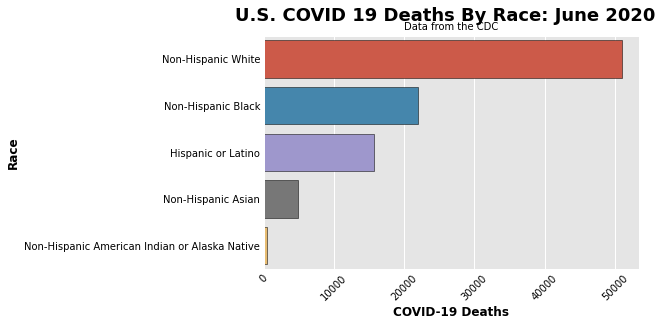

In [454]:
plt.style.use('ggplot')
plt.suptitle('U.S. COVID 19 Deaths By Race: June 2020', weight='bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
plt.xlabel('COVID-19 Deaths', weight = 'bold', color = 'black')
plt.ylabel('Race', weight = 'bold', color = 'black')
sns.barplot(x = 'COVID-19 Deaths', y = 'Race', data = covid_race, edgecolor='black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(color = 'black')

#### While the data demonstrates that white individuals comprised the group most vulnerable to a COVID-19 death, it must be noted that data on minority communities is often misreported and some experts assert that case and death numbers for the Hispanic and Black communities are much larger than the public realizes. 

In [402]:
pneum_race = pd.read_sql(''' SELECT Race, `Pneumonia Deaths` 
                             FROM CSV
                             WHERE NOT Race = 'Unknown' AND NOT Race = 'All races'
                             GROUP BY Race
                             ORDER BY `Pneumonia Deaths` DESC
                             LIMIT 5''', con)
pneum_race

,Race,Pneumonia Deaths
0,Non-Hispanic White,69960.0
1,Non-Hispanic Black,17542.0
2,Hispanic or Latino,12962.0
3,Non-Hispanic Asian,4527.0
4,Non-Hispanic American Indian or Alaska Native,709.0


In [499]:
pneum_race.describe()

,Pneumonia Deaths
count,5.000000
mean,21140.000000
std,28091.970463
min,709.000000
25%,4527.000000
50%,12962.000000
75%,17542.000000
max,69960.000000


#### Data from the CDC reveals that as of June 2020, pneumonia has been a deadlier virus to Americans than COVID, with a mean death count of 21,000 compared to COVID's 18,000 deaths and maximum values separated by nearly 20,000 deaths. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Non-Hispanic White'),
  Text(0, 1, 'Non-Hispanic Black'),
  Text(0, 2, 'Hispanic or Latino'),
  Text(0, 3, 'Non-Hispanic Asian'),
  Text(0, 4, 'Non-Hispanic American Indian or Alaska Native')])

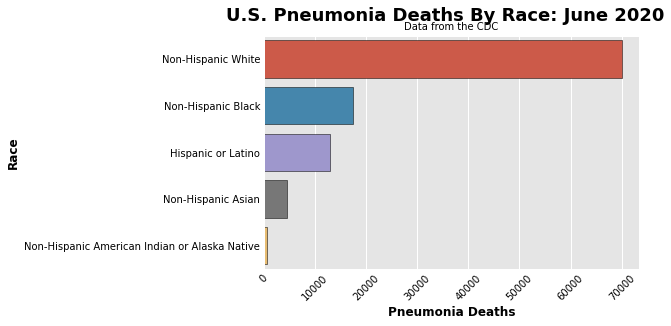

In [455]:
plt.style.use('ggplot')
plt.suptitle('U.S. Pneumonia Deaths By Race: June 2020', weight='bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
plt.xlabel('Pneumonia Deaths', weight = 'bold', color = 'black')
plt.ylabel('Race', weight = 'bold', color = 'black')
sns.barplot(x = 'Pneumonia Deaths', y = 'Race', data = pneum_race, edgecolor='black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(color = 'black')

In [416]:
flu_race = pd.read_sql(''' SELECT Race, `Influenza Deaths`
                           FROM CSV
                           WHERE NOT Race = 'Unknown' AND NOT Race = 'All races'
                           GROUP BY Race
                           ORDER BY `Influenza Deaths` DESC
                           LIMIT 5''', con)
flu_race

,Race,Influenza Deaths
0,Non-Hispanic White,4238.0
1,Non-Hispanic Black,950.0
2,Hispanic or Latino,799.0
3,Non-Hispanic Asian,262.0
4,Non-Hispanic American Indian or Alaska Native,67.0


In [501]:
flu_race.describe()

,Influenza Deaths
count,5.000000
mean,1263.200000
std,1702.667525
min,67.000000
25%,262.000000
50%,799.000000
75%,950.000000
max,4238.000000


#### In spring and summer of 2020, one of the prevailing media narratives was that despite growing COVID cases, the flu has consistently been the deadliest virus and has been the metric used to measure the impact of COVID-19. However by June of 2020, both pneumonia and COVID have killed more Americans. Even compared to pneumonia, the flu is considerably less deadly with a mean value of only 1200 compared to pneumonia's 21,000. The most individuals the flu killed by 2020 of summer 2020 was a mere 4200 compared to pneumonia's death toll of 70,000. Furthermore, the nationwide mask mandates assured America would go on to experience an uncharacteristically mild flu season in late 2020.

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

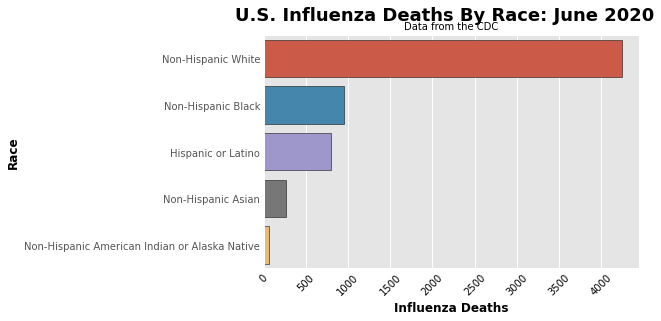

In [456]:
plt.style.use('ggplot')
plt.suptitle('U.S. Influenza Deaths By Race: June 2020', weight='bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
sns.barplot(x = 'Influenza Deaths', y = 'Race', data = flu_race, edgecolor='black')
plt.xlabel('Influenza Deaths', weight = 'bold', color = 'black')
plt.ylabel('Race', weight = 'bold', color = 'black')
plt.xticks(rotation=45, color = 'black')

#### The beginning of the pandemic impacted the most densely populated states that hardest, with New Jersey, New York (City) and Massachusetts suffering the highest initial death tolls in America at approximately 1000, 500 and 250 respectively. New Jersey and New York's death tolls would go on to overwhelm hospital systems and have the grim consequence of compelling healthcare providers to utilize mobile freezer trucks as makeshift morgues to keep pace with the rapidly climbing death count. 

In [437]:
state_covid = pd.read_sql(''' SELECT State, `COVID-19 Deaths`
                              FROM CSV
                              WHERE NOT State = 'All states' AND NOT State = 'Puerto Rico'
                              GROUP BY State
                              ORDER BY `COVID-19 Deaths` DESC
                              LIMIT 11''', con)
state_covid

,State,COVID-19 Deaths
0,New Jersey,1073.0
1,New York City,524.0
2,Massachusetts,256.0
3,Pennsylvania,247.0
4,Iowa,82.0
5,Michigan,73.0
6,North Carolina,65.0
7,Arizona,64.0
8,Virginia,41.0
9,Ohio,35.0


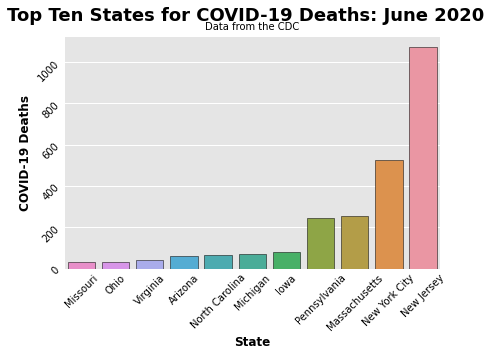

In [457]:
plt.suptitle('Top Ten States for COVID-19 Deaths: June 2020', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
plt.xlabel('State', weight = 'bold', color = 'black')
plt.ylabel('COVID-19 Deaths', weight = 'bold', color = 'black')
sns.barplot(x = 'State', y = 'COVID-19 Deaths', data = state_covid, edgecolor = 'black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(rotation = 45, color = 'black')
plt.gca().invert_xaxis()

#### Comparably, the flu deaths from spring to summer were fairly mild, with no state breaking triple digits. North Carolina experienced the most influenza deaths, followed narrowly by New York City. 

In [446]:
state_flu = pd.read_sql(''' SELECT State, `Influenza Deaths`
                            FROM CSV
                            WHERE NOT State = 'All states' AND NOT State = 'Puerto Rico'
                            GROUP BY State
                            ORDER BY `Influenza Deaths` DESC 
                            LIMIT 6''', con)
state_flu

,State,Influenza Deaths
0,North Carolina,38.0
1,New York City,34.0
2,Missouri,25.0
3,Pennsylvania,20.0
4,Massachusetts,20.0
5,Iowa,20.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'North Carolina'),
  Text(0, 1, 'New York City'),
  Text(0, 2, 'Missouri'),
  Text(0, 3, 'Pennsylvania'),
  Text(0, 4, 'Massachusetts'),
  Text(0, 5, 'Iowa')])

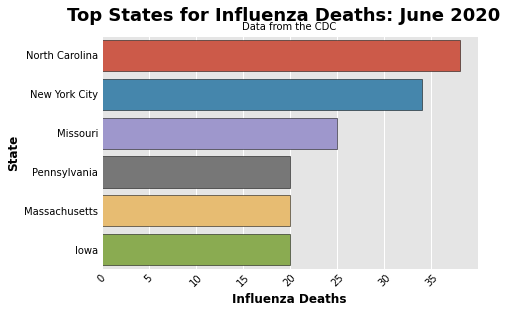

In [459]:
plt.suptitle('Top States for Influenza Deaths: June 2020', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
sns.barplot(x = 'Influenza Deaths', y = 'State', data = state_flu, edgecolor = 'black')
plt.xlabel('Influenza Deaths', weight = 'bold', color = 'black')
plt.ylabel('State', weight = 'bold', color = 'black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(color = 'black')

#### Once again, the pneumonia death count dwarfed the influenza death toll, with all of the top states reporting losses in the triple digits. Like COVID, New Jersey and New York City suffered the most deaths due to their population ratio and overwhelmed healthcare professionals. 

In [450]:
state_pneum = pd.read_sql(''' SELECT State, `Pneumonia Deaths`
                            FROM CSV
                            WHERE NOT State = 'All states' AND NOT State = 'Puerto Rico'
                            GROUP BY State
                            ORDER BY `Pneumonia Deaths` DESC 
                            LIMIT 6''', con)
state_pneum

,State,Pneumonia Deaths
0,New Jersey,743.0
1,Pennsylvania,301.0
2,North Carolina,280.0
3,Arizona,268.0
4,New York City,253.0
5,Massachusetts,229.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Jersey'),
  Text(0, 1, 'Pennsylvania'),
  Text(0, 2, 'North Carolina'),
  Text(0, 3, 'Arizona'),
  Text(0, 4, 'New York City'),
  Text(0, 5, 'Massachusetts')])

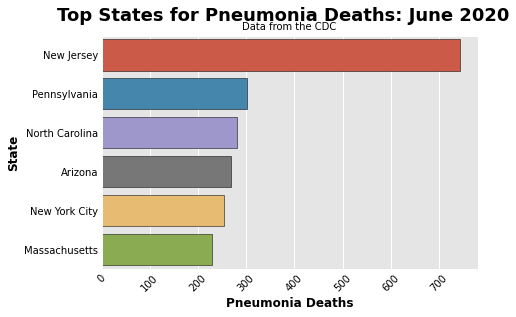

In [462]:
plt.suptitle('Top States for Pneumonia Deaths: June 2020', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
sns.barplot(x = 'Pneumonia Deaths', y = 'State', data = state_pneum, edgecolor = 'black')
plt.xlabel('Pneumonia Deaths', weight = 'bold', color = 'black')
plt.ylabel('State', weight = 'bold', color = 'black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(color = 'black')

#### Although middle-aged Americans were often in high-risk categories for COVID-19, one of the primary objectives of migitation measures was to protect elderly Americans 65+. Initially, due to their age and underlying conditions, this population segment suffered disproportionately to other age groups. Additionally, even though many of these individuals quarantined, those living in nursing homes were exposed to potentially deadly outbreaks that often represented a super spreader event for the states such facilities called home. 

In [469]:
covid_age = pd.read_sql(''' SELECT Age, `COVID-19 Deaths`
                            FROM CSV
                            WHERE NOT Age = 'All Ages' 
                            GROUP BY Age
                            ORDER BY `COVID-19 Deaths` DESC
                            LIMIT 6''', con)
covid_age

,Age,COVID-19 Deaths
0,85 years and over,22692.0
1,75-84 years,14387.0
2,65-74 years,8732.0
3,55-64 years,3728.0
4,45-54 years,1013.0
5,35-44 years,245.0


In [503]:
covid_age.describe()

,COVID-19 Deaths
count,6.000000
mean,8466.166667
std,8753.156766
min,245.000000
25%,1691.750000
50%,6230.000000
75%,12973.250000
max,22692.000000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '85 years and over'),
  Text(0, 1, '75-84 years'),
  Text(0, 2, '65-74 years'),
  Text(0, 3, '55-64 years'),
  Text(0, 4, '45-54 years'),
  Text(0, 5, '35-44 years')])

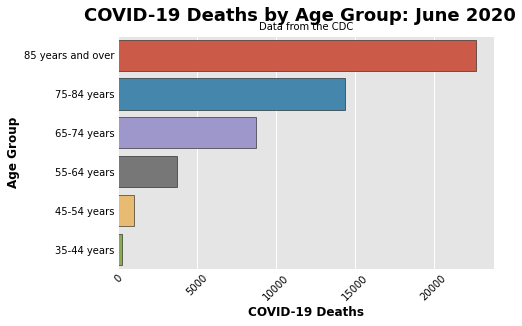

In [472]:
plt.suptitle('COVID-19 Deaths by Age Group: June 2020', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
sns.barplot(x = 'COVID-19 Deaths', y = 'Age', data = covid_age, edgecolor = 'black')
plt.xlabel('COVID-19 Deaths', weight = 'bold', color = 'black')
plt.ylabel('Age Group', weight = 'bold', color = 'black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(color = 'black')

#### Interestingly, when comparing the COVID death rate to the influenza death rate, while both the 85+ groups suffered the most deaths, the gap between the 85+ population and 75-84-year-old individuals differs by about 8,000 in the COVID death count. Conversely, for influenza, these populations and even those 65-74 suffered proportional losses, with individuals 75-84 and 85+ experiencing a death count that differed by only 7 individuals (1037 and 1030 respectively).  

In [492]:
flu_age = pd.read_sql(''' SELECT Age, `Influenza Deaths`
                            FROM CSV
                            WHERE NOT Age = 'All Ages' 
                            GROUP BY Age
                            ORDER BY `Influenza Deaths` DESC
                            LIMIT 6''', con)
flu_age

,Age,Influenza Deaths
0,85 years and over,1037.0
1,75-84 years,1030.0
2,65-74 years,923.0
3,55-64 years,702.0
4,45-54 years,284.0
5,35-44 years,113.0


In [502]:
flu_age.describe()

,Influenza Deaths
count,6.000000
mean,681.500000
std,396.931606
min,113.000000
25%,388.500000
50%,812.500000
75%,1003.250000
max,1037.000000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '85 years and over'),
  Text(0, 1, '75-84 years'),
  Text(0, 2, '65-74 years'),
  Text(0, 3, '55-64 years'),
  Text(0, 4, '45-54 years'),
  Text(0, 5, '35-44 years')])

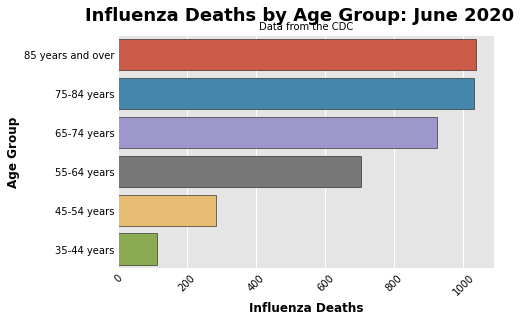

In [478]:
plt.suptitle('Influenza Deaths by Age Group: June 2020', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
sns.barplot(x = 'Influenza Deaths', y = 'Age', data = flu_age, edgecolor = 'black')
plt.xlabel('Influenza Deaths', weight = 'bold', color = 'black')
plt.ylabel('Age Group', weight = 'bold', color = 'black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(color = 'black')

In [493]:
pneum_age = pd.read_sql(''' SELECT Age, `Pneumonia Deaths`
                            FROM CSV
                            WHERE NOT Age = 'All Ages'
                            GROUP BY  Age
                            ORDER BY `Pneumonia Deaths` DESC
                            LIMIT 6''', con)
pneum_age.head(8)

,Age,Pneumonia Deaths
0,85 years and over,25853.0
1,75-84 years,19981.0
2,65-74 years,13860.0
3,55-64 years,7078.0
4,45-54 years,2069.0
5,35-44 years,671.0


#### While elderly pneumonia patients experienced the most deaths when compared to COVID and influenza, the distribution more closely represents the COVID-19 death count, with the oldest Americans experiencing significant death counts, but those below 65-74-years-old experiencing less loss. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '85 years and over'),
  Text(0, 1, '75-84 years'),
  Text(0, 2, '65-74 years'),
  Text(0, 3, '55-64 years'),
  Text(0, 4, '45-54 years'),
  Text(0, 5, '35-44 years')])

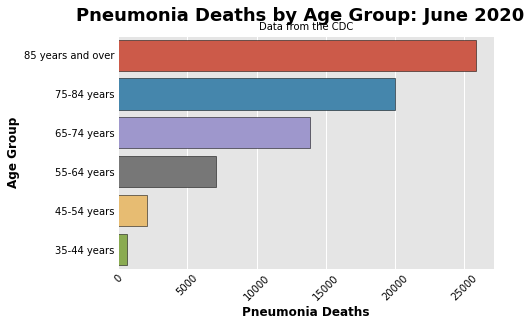

In [494]:
plt.suptitle('Pneumonia Deaths by Age Group: June 2020', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the CDC', color = 'black').set_fontsize(10)
sns.barplot(x = 'Pneumonia Deaths', y = 'Age', data = pneum_age, edgecolor = 'black')
plt.xlabel('Pneumonia Deaths', weight = 'bold', color = 'black')
plt.ylabel('Age Group', weight = 'bold', color = 'black')
plt.xticks(rotation=45, color = 'black')
plt.yticks(color = 'black')

In [512]:
# Import and display data frame of data scraped from Wikipedia. 
covid_web = pd.read_csv('covid_notable_death_chart_clean.csv')
del covid_web['Unnamed: 0']
covid_web.describe()

,Date,Name,Age,Significance,Deceased in
count,619,619,611,619,599
unique,153,619,79,536,308
top,7 April,Allen Garfield,89,Footballer,United States (New York City)
freq,20,1,22,18,43


In [45]:
# Import and display first three rows of API data source. 
covid_api = pd.read_csv('covid_api.csv')
del covid_api['Unnamed: 0']
covid_api.head(3)

,date,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths
0,2019-12-31,0,0,Afghanistan,38041757.0,NaN,0,0
1,2020-01-01,0,0,Afghanistan,38041757.0,NaN,0,0
2,2020-01-02,0,0,Afghanistan,38041757.0,NaN,0,0


In [7]:
# Drop NA values.
covid_api.dropna(inplace=True)

In [8]:
# Display first three rows of API data. 
covid_api.head(3)

,Unnamed: 0,date,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths
13,13,2020-01-13,0,0,Afghanistan,38041757.0,0.0,0,0
14,14,2020-01-14,0,0,Afghanistan,38041757.0,0.0,0,0
15,15,2020-01-15,0,0,Afghanistan,38041757.0,0.0,0,0


In [9]:
# Create COVID_race data base and establish cursor object. 
con = sqlite3.connect('covid_race.db')
cursor = con.cursor()

In [46]:
# Convert CSV file to SQL Lite and read SQL Lite query. 
covid_csv.to_sql("CSV", con, if_exists='replace', index=False)
pd.read_sql('select * from CSV', con)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths
0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0
1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0
2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0
3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0
4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0
...,...,...,...,...,...,...,...,...,...,...
1759,6/10/20,Puerto Rico,85 years and over,Hispanic or Latino,25.0,397.0,24.0,10.0,436.0,2946.0
1760,6/10/20,Puerto Rico,Under 1 year,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
1761,6/10/20,Puerto Rico,1-4 years,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
1762,6/10/20,Puerto Rico,5-14 years,Unknown,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Convert web data to SQL Lite and read query. 
covid_web.to_sql("WEB", con, if_exists='replace', index=False)
pd.read_sql('select * from WEB', con)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Date,Name,Age,Significance,Deceased in
0,25 January,Liang Wudong,60,Doctor of otorhinolaryngology (first death due...,China (Wuhan)
1,26 January,Wang Xianliang,62,Director of the Ethnic and Religious Affairs C...,China (Wuhan)
2,27 January,Yang Xiaobo,57,Mayor of Huangshi (2009–2014) and delegate to ...,China (Wuhan)
3,6 February,Qiu Jun,72,Bodybuilder,China (Wuhan)
4,7 February,Hong Ling,53,Professor of genetics at Huazhong University o...,China (Wuhan)
...,...,...,...,...,...
614,2 August,Tootie Robbins,62,American football player,United States (Chandler)
615,2 August,Satyanarayan Singh,77,Member of the Bihar Legislative Assembly (1990...,India (Patna)
616,3 August,ATM Alamgir,70,Member of the Jatiya Sangsad (1991–1996),Bangladesh (Dhaka)
617,3 August,Dani Anwar,52,Senator (2009–2014),Indonesia (Jakarta)


In [38]:
covid_web = pd.read_sql(''' SELECT * FROM WEB LIMIT 5''', con)
del covid_web['Unnamed: 0']

#### In order to personalize the rather abstract (and cold) death counts, I scraped data from a Wikipedia page listing individual deaths of notable individuals around the world. 

In [48]:
covid_web = pd.read_sql(''' SELECT * FROM WEB LIMIT 5 ''', con)
covid_web.head(3)

,Date,Name,Age,Significance,Deceased in
0,25 January,Liang Wudong,60,Doctor of otorhinolaryngology (first death due...,China (Wuhan)
1,26 January,Wang Xianliang,62,Director of the Ethnic and Religious Affairs C...,China (Wuhan)
2,27 January,Yang Xiaobo,57,Mayor of Huangshi (2009–2014) and delegate to ...,China (Wuhan)


In [509]:
covid_age = pd.read_sql(''' SELECT Name, Age
                FROM WEB
                WHERE Age > 20 AND Age < 55
                GROUP BY Name
                ORDER BY Age DESC''', con)

In [506]:
covid_age['Age'].describe()

count               6
unique              6
top       35-44 years
freq                1
Name: Age, dtype: object

#### The ages notable individuals tended to die at mirrored the second wave COVID trend of targeting those middle-aged and older, with the highest losses within this dataset experienced in the 45 to 60-year-old group.

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Data scraped from Wikipedia'}, xlabel='Age', ylabel='Density'>

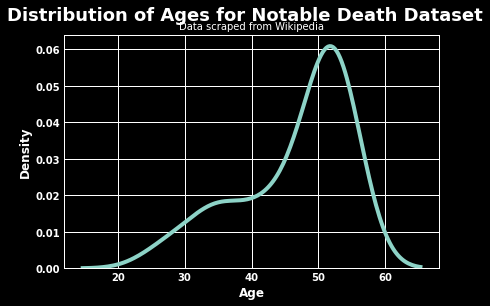

In [511]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Ages for Notable Death Dataset', weight = 'bold', color = 'white').set_fontsize(18)
plt.title('Data scraped from Wikipedia', color = 'white').set_fontsize(10)
plt.xlabel('Age', weight = 'bold', color = 'white')
plt.ylabel('Density', weight = 'bold', color = 'white')
plt.xticks(color = 'white', weight = 'bold')
plt.yticks(color = 'white', weight = 'bold')
sns.distplot(covid_age['Age'], kde=True, hist=False)

#### There were nine doctors listed among the notable individual deaths in the dataset. Incidentally, these doctors tended to practice in areas like China and the U.K. where the virus was deadliest in the spring and summer of 2020. 

In [507]:
sig = pd.read_sql(''' SELECT Name, Age, Significance, `Deceased in`
                      FROM WEB 
                      WHERE Significance LIKE '%doctor%'
                      ''', con)
sig

,Name,Age,Significance,Deceased in
0,Liang Wudong,60,Doctor of otorhinolaryngology (first death due...,China (Wuhan)
1,Li Wenliang,33,Doctor of ophthalmology at Central Hospital of...,China (Wuhan)
2,Lin Zhengbin,62,Doctor of organ transplantation,China (Wuhan)
3,Jean-Jacques Razafindranazy,68,Doctor of pediatrics,France (Lille)
4,Usama Riaz,26,Doctor,Pakistan (Gilgit)
5,Feriha Öz,86–87,"Pathologist, academic and medical doctor",Turkey
6,Anton Sebastianpillai,75,Doctor and author (writing as Anton Sebastian),United Kingdom (London)
7,Naek L. Tobing,79,Doctor,Indonesia (Jakarta)
8,Manjeet Singh Riyat,52,Doctor,United Kingdom (Derby)


#### 28 actors were listed. Actors from all media became proponents of mitigation measures after COVID restricted gatherings in theaters and other performing venues. 

In [508]:
actor = pd.read_sql(''' SELECT Name, Age, Significance, `Deceased in`
                        FROM WEB 
                        WHERE Significance LIKE '%actor%' ''', con)
actor

,Name,Age,Significance,Deceased in
0,Júlia Sigmond,90,Romanian-Hungarian puppet actor and Esperantist,Italy (Piacenza)
1,Mark Blum,69,Actor,United States (New York City)
2,Menggie Cobarrubias,66,Actor,Philippines (Manila)
3,Hamish Wilson,77,Actor,United Kingdom (Rutherglen)
4,Julie Bennett,88,Voice actor,United States (Los Angeles)
5,Viktar Dashkevich,75,Stage actor,Belarus (Vitebsk)
6,Andrew Jack,76,Dialect coach and actor,United Kingdom (London)
7,Turhan Kaya,68,Actor,Turkey (Istanbul)
8,Jay Benedict,68,American actor,United Kingdom (London)
9,Forrest Compton,94,Actor,United States (Shelter Island)


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

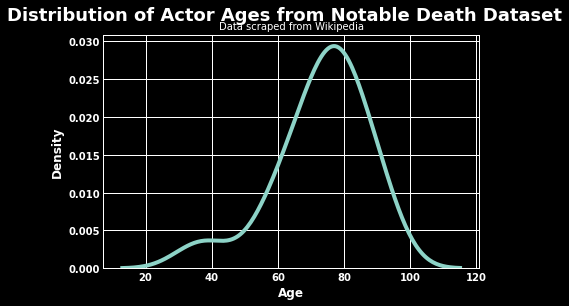

In [519]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Actor Ages from Notable Death Dataset', weight ='bold', color = 'white').set_fontsize(18)
plt.title('Data scraped from Wikipedia', color = 'white').set_fontsize(10)
sns.distplot(actor['Age'], kde=True, hist=False)
plt.xlabel('Age', weight = 'bold', color = 'white')
plt.xticks(weight = 'bold', color = 'white')
plt.yticks(weight = 'bold', color = 'white')
plt.ylabel('Density', weight = 'bold', color = 'white')

In [532]:
footballer = pd.read_sql(''' SELECT Name, Age, Significance
                          FROM WEB
                          WHERE Significance LIKE '%footballer%'
                          GROUP BY Significance
                          ORDER BY Age DESC ''', con)
footballer

,Name,Age,Significance
0,David Méresse,89,French footballer and coach
1,Noel Walsh,84,"Military Officer, footballer, manager and admi..."
2,Benito Joanet,84,Footballer and coach
3,Luciano Federici,81,Footballer
4,Brian Arrowsmith,79,British footballer and manager
5,Dave Bacuzzi,79,British footballer
6,Danny Delaney,77,Footballer and hurler
7,Baldiri Alavedra,76,Spanish footballer
8,John Rowlands,73,English footballer
9,Mohamed Farah,59,Somali international footballer


#### There were 10 footballers in the dataset, although these individuals tended to be above retirement age, making them more suceptible to more severe variants of COVID-19. 

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

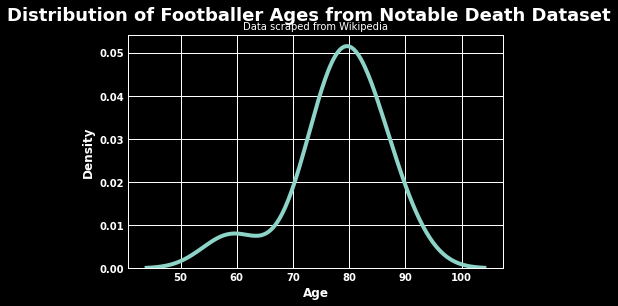

In [534]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Footballer Ages from Notable Death Dataset', weight ='bold', color = 'white').set_fontsize(18)
plt.title('Data scraped from Wikipedia', color = 'white').set_fontsize(10)
sns.distplot(footballer['Age'], kde=True, hist=False)
plt.xlabel('Age', weight = 'bold', color = 'white')
plt.xticks(weight = 'bold', color = 'white')
plt.yticks(weight = 'bold', color = 'white')
plt.ylabel('Density', weight = 'bold', color = 'white')

In [348]:
# Convert API data frame to SQL and query COVID_race data base. 
covid_api.to_sql("API", con, if_exists='replace', index=False)
pd.read_sql('select * from API', con)

,date,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths
0,2019-12-31,0,0,Afghanistan,38041757.0,NaN,0,0
1,2020-01-01,0,0,Afghanistan,38041757.0,NaN,0,0
2,2020-01-02,0,0,Afghanistan,38041757.0,NaN,0,0
3,2020-01-03,0,0,Afghanistan,38041757.0,NaN,0,0
4,2020-01-04,0,0,Afghanistan,38041757.0,NaN,0,0
...,...,...,...,...,...,...,...,...
34308,2020-08-01,77,14,Zimbabwe,14645473.0,11.942257,3169,67
34309,2020-08-02,490,2,Zimbabwe,14645473.0,14.891974,3659,69
34310,2020-08-03,262,1,Zimbabwe,14645473.0,15.772792,3921,70
34311,2020-08-04,154,10,Zimbabwe,14645473.0,16.127851,4075,80


#### Unlike prior pandemics (or pandemic threats) like Ebola and H1N1 which originated in developing nations, developed nations such as the U.S., China and Russia experienced significant losses from COVID as early as March 2020. 

In [351]:
one_hundred_g = pd.read_sql(''' SELECT country, cases, cumlative_cases, deaths, population, date, cumulative_deaths  
                FROM API 
                WHERE cases > 10000 AND deaths > 100
                GROUP BY country
                ORDER BY cumlative_cases DESC
                LIMIT 10''', con)
one_hundred_g

,country,cases,cumlative_cases,deaths,population,date,cumulative_deaths
0,India,10956,297535,396,1.366418e+09,2020-06-12,8498
1,Colombia,10284,267385,297,5.033944e+07,2020-07-29,9074
2,Chile,36179,220628,232,1.895204e+07,2020-06-18,3615
3,South_Africa,10134,215855,192,5.855827e+07,2020-07-08,3502
4,Russia,10817,198676,104,1.458723e+08,2020-05-10,1827
5,Brazil,10503,125218,615,2.110495e+08,2020-05-07,8536
6,China,15141,59865,254,1.433784e+09,2020-02-13,1368
7,United_States_of_America,11236,46442,119,3.290649e+08,2020-03-24,590
8,Kyrgyzstan,11505,24606,728,6.415851e+06,2020-07-18,900


#### Although the coronavirus pandemic generated terabytes of data, it was unclear which milestones a nation should view as a tipping point (either positive or negative) in its battle with COVID-19. For visualization purposes, I have chosen countries with more than 10,000 cumulative cases and 100 deaths by May/June 2020 as a threshold for this analysis. 

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

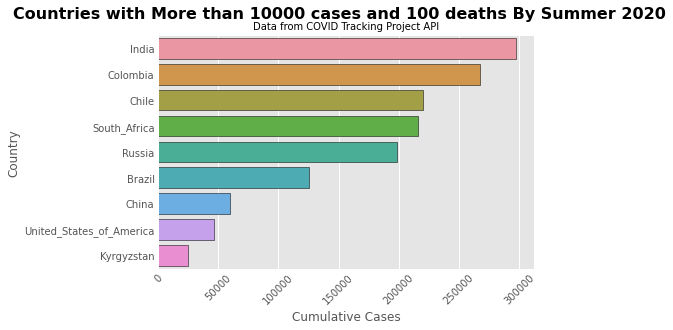

In [135]:
plt.suptitle('Countries with More than 10000 cases and 100 deaths By Summer 2020', weight = 'bold', color = 'black').set_fontsize(16)
plt.title('Data from COVID Tracking Project API', color = 'black').set_fontsize(10)
sns.barplot(x = 'cumlative_cases', y = 'country', data = twenty_k, edgecolor='black')
plt.xlabel('Cumulative Cases')
plt.ylabel('Country')
plt.xticks(rotation=45)

In [145]:
deaths = pd.read_sql(''' SELECT country, deaths, cumulative_deaths
                FROM API
                WHERE country = 'United_States_of_America' 
                AND date > 2020-03-13 
                GROUP BY deaths
                ORDER BY cumulative_deaths DESC ''', con)
deaths

,country,deaths,cumulative_deaths
0,United_States_of_America,1403,156806
1,United_States_of_America,543,155403
2,United_States_of_America,413,154860
3,United_States_of_America,1133,154447
4,United_States_of_America,1244,153314
...,...,...,...
142,United_States_of_America,2,11
143,United_States_of_America,3,9
144,United_States_of_America,4,6
145,United_States_of_America,1,1


#### Throughout the pandemic officials have issued guidance based on two variables: Daily and cumulative values. Government and non-government officials crafted policy by examining how daily trends compared with cases and deaths the nation had already experienced. 

#### The graph below reveals that by August of 2020 the nation had experienced nearly 4000 daily COVID deaths, even as the cumulative death count began to drop due to quarantine orders. 

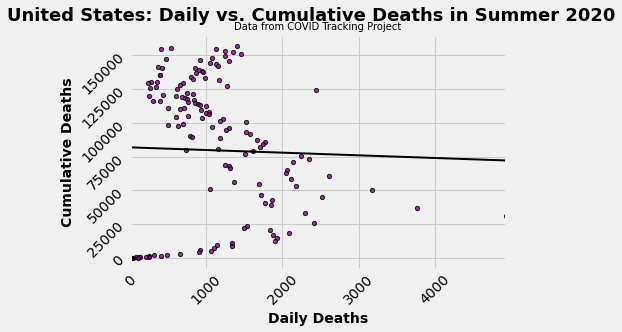

In [345]:
plt.suptitle('United States: Daily vs. Cumulative Deaths in Summer 2020', weight = 'bold').set_fontsize(18)
plt.title('Data from COVID Tracking Project', color = 'black').set_fontsize(10)
sns.regplot(x = 'deaths', y = 'cumulative_deaths', data = deaths, ci=None, 
            line_kws={'linewidth':2, 'color': 'black', }, scatter_kws={'s': 18, 'color': 'purple', 'edgecolor': 'black'})
plt.xticks(rotation=45, color= 'black')
plt.yticks(rotation=45, color = 'black')
plt.xlabel('Daily Deaths', weight = 'bold', color = 'black').set_fontsize(14)
plt.ylabel('Cumulative Deaths', weight = 'bold', color = 'black').set_fontsize(14)

In [520]:
us_case_summer = pd.read_sql(''' SELECT cases, date
                FROM API
                WHERE country = 'United_States_of_America'
                AND date > 2020-03-13
                GROUP BY date
                ORDER BY date DESC
                LIMIT 35''', con)

#### Initially, scientists hypothesized that warmer temperatures would help 'burn' COVID viral particles off of surfaces and help decrease case numbers overall. However, a time series data analysis reveals that daily cases rose above 75,000 during several days in July, climbing steadily after the 4th of July weekend, a traditional time for large gatherings in the U.S. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

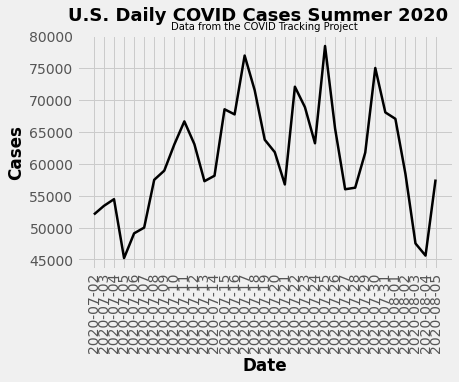

In [201]:
plt.style.use('fivethirtyeight')
plt.suptitle('U.S. Daily COVID Cases Summer 2020', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the COVID Tracking Project', color = 'black').set_fontsize(10)
sns.lineplot(x = 'date', y = 'cases', data = case_date, linewidth = 2.5, color = 'black')
plt.gca().invert_xaxis()
plt.ylabel('Cases', weight = 'bold', color = 'black')
plt.xlabel('Date', weight = 'bold', color = 'black')
plt.xticks(rotation=90)

In [323]:
us_pop_cases = pd.read_sql(''' SELECT date, cumlative_cases, cases
                               FROM API
                               WHERE country = 'United_States_of_America'
                               GROUP BY date
                               ORDER BY date ASC''', con)
us_pop_cases

,date,cumlative_cases,cases
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0
...,...,...,...
214,2020-08-01,4562037,67023
215,2020-08-02,4620444,58407
216,2020-08-03,4667955,47511
217,2020-08-04,4713562,45607


#### Just as there was a correlation between daily deaths and cumulative deaths, there is also a strong positive correlation between daily cases and cumulative cases. Daily cases reached their peak at 70,000+ during the warm summer months. However, it must be noted that testing methods were improving at this time and COVID-19 tests were beginning to become available to all Americans, not just those who showed conventional coronavirus symptoms. 

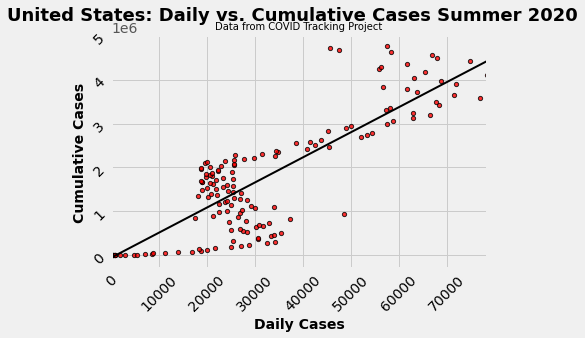

In [324]:
plt.suptitle('United States: Daily vs. Cumulative Cases Summer 2020', weight = 'bold').set_fontsize(18)
plt.title('Data from COVID Tracking Project', color = 'black').set_fontsize(10)
sns.regplot(x = 'cases', y = 'cumlative_cases', data = us_pop_cases, ci=None, 
            line_kws={'linewidth':2, 'color': 'black', }, scatter_kws={'s': 18, 'color': 'red', 'edgecolor': 'black'})
plt.xticks(rotation=45, color= 'black')
plt.yticks(rotation=45, color = 'black')
plt.xlabel('Daily Cases', weight = 'bold', color = 'black').set_fontsize(14)
plt.ylabel('Cumulative Cases', weight = 'bold', color = 'black').set_fontsize(14)

In [334]:
uk_daily_and_all = pd.read_sql(''' SELECT cases, cumlative_cases, date
                                   FROM API
                                   WHERE country = 'United_Kingdom'
                                   GROUP BY cases
                                   ORDER BY date ASC''', con)
uk_daily_and_all

,cases,cumlative_cases,date
0,0,0,2019-12-31
1,2,2,2020-02-01
2,1,3,2020-02-05
3,4,8,2020-02-10
4,5,18,2020-02-27
...,...,...,...
153,880,303181,2020-08-01
154,771,303952,2020-08-02
155,743,304695,2020-08-03
156,928,305623,2020-08-04


#### The United Kingdom was one of the nations hardest hit by COVID-19 in the spring of 2020. At the summer peak, cases rose to more than 300,000. Although the U.K.'s population is 66 million, many of these cases were located in centralized, densely populated London.

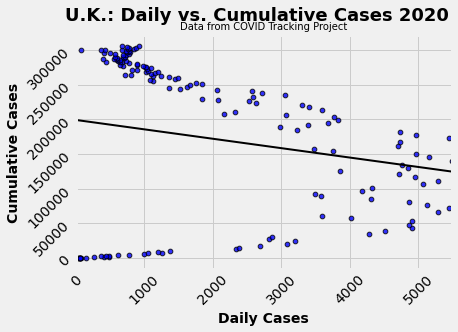

In [336]:
plt.suptitle('U.K.: Daily vs. Cumulative Cases 2020', weight = 'bold').set_fontsize(18)
plt.title('Data from COVID Tracking Project', color = 'black').set_fontsize(10)
sns.regplot(x = 'cases', y = 'cumlative_cases', data = uk_daily_and_all, ci=None, 
            line_kws={'linewidth':2, 'color': 'black', }, scatter_kws={'s': 22, 'color': 'blue', 'edgecolor': 'black'})
plt.xticks(rotation=45, color= 'black')
plt.yticks(rotation=45, color = 'black')
plt.xlabel('Daily Cases', weight = 'bold', color = 'black').set_fontsize(14)
plt.ylabel('Cumulative Cases', weight = 'bold', color = 'black').set_fontsize(14)

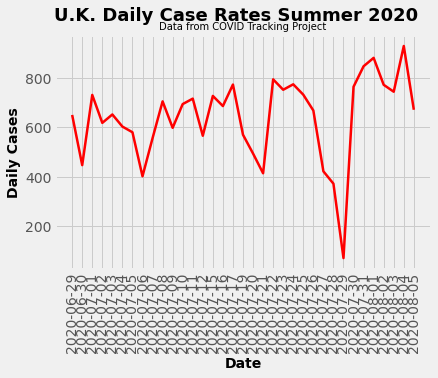

In [294]:
plt.suptitle('U.K. Daily Case Rates Summer 2020', weight='bold', color='black').set_fontsize(18)
plt.title('Data from COVID Tracking Project', color = 'black').set_fontsize(10)
sns.lineplot(x = 'date', y = 'cases', data = uk_all_cases_summer, linewidth=2.5, color = 'red')
plt.xlabel('Date', weight = 'bold', color = 'black').set_fontsize(14)
plt.ylabel('Daily Cases', weight = 'bold', color = 'black').set_fontsize(14)
plt.xticks(rotation=90)
plt.gca().invert_xaxis()

In [342]:
china_cases_summer = pd.read_sql(''' SELECT cases, cumlative_cases, date, country
                                     FROM API
                                     WHERE country = 'China'
                                     GROUP BY cases
                                     ORDER BY date ASC
                                     ''', con)
china_cases_summer

,cases,cumlative_cases,date,country
0,27,27,2019-12-31,China
1,0,27,2020-01-01,China
2,17,44,2020-01-03,China
3,15,59,2020-01-05,China
4,4,63,2020-01-17,China
...,...,...,...,...
128,166,87655,2020-08-01,China
129,172,87827,2020-08-02,China
130,158,87985,2020-08-03,China
131,114,88099,2020-08-04,China


#### Any data regarding the spread of COVID-19 in China must be properly scrutinzed due to allegations that the nation's government underreported cases and death. With that in mind, even though China was the epicenter of COVID-19 in winter of 2019, strict quarantine measures meant that both its cumulative case count and daily case rate decreased significantly by summer of 2020. 

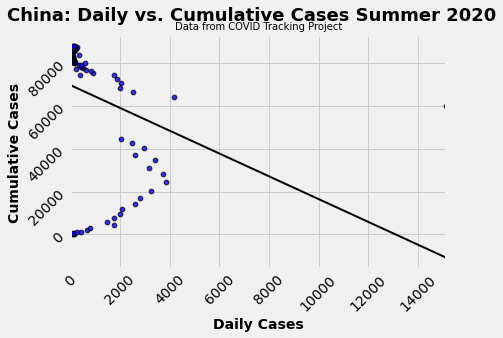

In [341]:
plt.suptitle('China: Daily vs. Cumulative Cases Summer 2020', weight = 'bold').set_fontsize(18)
plt.title('Data from COVID Tracking Project', color = 'black').set_fontsize(10)
sns.regplot(x = 'cases', y = 'cumlative_cases', data = china_cases_summer, ci=None, 
            line_kws={'linewidth':2, 'color': 'black', }, scatter_kws={'s': 22, 'color': 'blue', 'edgecolor': 'black'})
plt.xticks(rotation=45, color= 'black')
plt.yticks(rotation=45, color = 'black')
plt.xlabel('Daily Cases', weight = 'bold', color = 'black').set_fontsize(14)
plt.ylabel('Cumulative Cases', weight = 'bold', color = 'black').set_fontsize(14)

In [220]:
uk_all_cases_summer = pd.read_sql(''' SELECT cases, date
                                 FROM API
                                 WHERE country = 'United_Kingdom'
                                 GROUP BY cases
                                 ORDER BY date DESC
                                 LIMIT 35''', con)
uk_all_cases_summer

,cases,date
0,670,2020-08-05
1,928,2020-08-04
2,743,2020-08-03
3,771,2020-08-02
4,880,2020-08-01
5,846,2020-07-31
6,763,2020-07-30
7,70,2020-07-29
8,371,2020-07-28
9,421,2020-07-27


In [231]:
china_all_cases_summer = pd.read_sql(''' SELECT date, cases 
                                         FROM API
                                         WHERE country = 'China'
                                         GROUP BY cases
                                         ORDER BY date DESC
                                         LIMIT 25''', con)
china_all_cases_summer

,date,cases
0,2020-08-05,107
1,2020-08-04,114
2,2020-08-03,158
3,2020-08-02,172
4,2020-08-01,166
5,2020-07-31,276
6,2020-07-30,223
7,2020-07-29,207
8,2020-07-28,213
9,2020-07-27,189


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

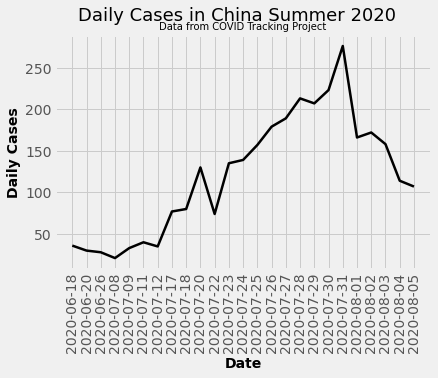

In [242]:
plt.suptitle('Daily Cases in China Summer 2020', color = 'black').set_fontsize(18)
plt.title('Data from COVID Tracking Project').set_fontsize(10)
sns.lineplot(x = 'date', y = 'cases', data = china_all_cases_summer, color = 'black', linewidth=2.5)
plt.xlabel('Date', weight = 'bold', color = 'black').set_fontsize(14)
plt.ylabel('Daily Cases', weight = 'bold', color = 'black').set_fontsize(14)
plt.gca().invert_xaxis()
plt.xticks(rotation=90)

In [360]:
# Create first query from single table: API. 
cumulative_query = pd.read_sql_query(''' SELECT * FROM API WHERE "14_day_cumulative_rate" > 10 ''', con)
# Print all entries where the 14 day cumulative rate is greater than 10.00. 
cumulative_query

,date,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths
0,2020-05-16,1063,32,Afghanistan,38041757.0,10.690884,6402,168
1,2020-05-17,0,0,Afghanistan,38041757.0,10.338639,6402,168
2,2020-05-18,262,1,Afghanistan,38041757.0,10.409614,6664,169
3,2020-05-19,408,4,Afghanistan,38041757.0,10.982668,7072,173
4,2020-05-20,581,5,Afghanistan,38041757.0,11.642470,7653,178
...,...,...,...,...,...,...,...,...
10655,2020-08-01,77,14,Zimbabwe,14645473.0,11.942257,3169,67
10656,2020-08-02,490,2,Zimbabwe,14645473.0,14.891974,3659,69
10657,2020-08-03,262,1,Zimbabwe,14645473.0,15.772792,3921,70
10658,2020-08-04,154,10,Zimbabwe,14645473.0,16.127851,4075,80


#### One metric world, national and local leaders gravitated toward was the two week cumulative rate. If cases in a given area fell below a certain threshold within two weeks, officials would be more likely to recommend relaxing mitigation measures like dining occupancy restrictions. 

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

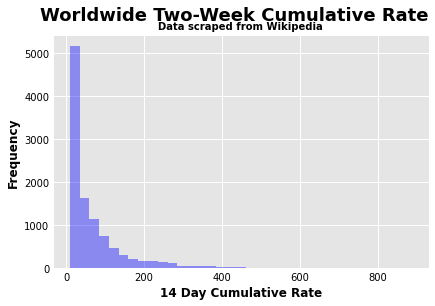

In [526]:
# Create a distribution plot without KDE. 
plt.style.use('ggplot')
plt.suptitle('Worldwide Two-Week Cumulative Rate', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data scraped from Wikipedia', weight = 'bold', color = 'black').set_fontsize(10)
sns.distplot(cumulative_query['14_day_cumulative_rate'], kde=False, bins=35, color = 'blue')
plt.xlabel('14 Day Cumulative Rate', weight = 'bold', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.ylabel('Frequency', weight = 'bold', color = 'black')

In [535]:
cumulative_query['14_day_cumulative_rate'].describe()

count    10660.000000
mean        73.046507
std         95.559807
min         10.004887
25%         18.114034
50%         37.613584
75%         86.822912
max        885.924117
Name: 14_day_cumulative_rate, dtype: float64

#### The final step in this project was to combine all three data sources: CSV file, API call and web data into a single data frame. After this task was completed, I converted the dataframe to a SQL database called 'COVID.' 

In [18]:
# Combine all three sources using Pandas concat command.
covid_three = pd.concat([covid_csv, covid_api, covid_web])

In [19]:
# Display first five rows. 
covid_three.head()

,Unnamed: 0,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Delte unnamed row. 
del covid_three['Unnamed: 0']

In [21]:
# Display updated data frame. 
covid_three.head()

,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Examine remaining null values for each column. 
covid_three.isna().sum()

Report date                                 32151
State                                       32151
Age                                         31540
Race                                        32151
COVID-19 Deaths                             32151
Pneumonia Deaths                            32151
Influenza Deaths                            32151
Pneumonia and COVID-19 Deaths               32151
Pneumonia, Influenza, or COVID-19 Deaths    32151
Total Deaths                                32151
date                                         2383
cases                                        2383
deaths                                       2383
country                                      2383
population                                   2383
14_day_cumulative_rate                       2383
cumlative_cases                              2383
cumulative_deaths                            2383
Date                                        33296
Name                                        33296


In [23]:
# Impute NAs with zero to avoid losing columns entirely. 
covid_three.fillna(0)

,Report date,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,6/10/20,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,6/10/20,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,6/10/20,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,6/10/20,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,6/10/20,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,0,0,62,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,2 August,Tootie Robbins,American football player,United States (Chandler)
615,0,0,77,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,2 August,Satyanarayan Singh,Member of the Bihar Legislative Assembly (1990...,India (Patna)
616,0,0,70,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,3 August,ATM Alamgir,Member of the Jatiya Sangsad (1991–1996),Bangladesh (Dhaka)
617,0,0,52,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,3 August,Dani Anwar,Senator (2009–2014),Indonesia (Jakarta)


In [24]:
# Delete 'report date' because it was throwing a duplicate error with 'date' and it is irrelevant to analysis.
del covid_three['Report date']

In [25]:
# Display first five rows. 
covid_three.head()

,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,date,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
covid_three = covid_three.fillna(0)

In [27]:
covid_three.head()

,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,date,...,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0


In [28]:
# Delete 'date' to address duplicate error message. 
del covid_three['date']

In [29]:
# Create new table based on combined data sources and reset index. 
covid_three.to_sql("COVID", con, if_exists='replace', index=False)
# Query data base to read table. 
pd.read_sql('select * from COVID', con)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,State,Age,Race,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths,cases,deaths,country,population,14_day_cumulative_rate,cumlative_cases,cumulative_deaths,Date,Name,Significance,Deceased in
0,All states,All Ages,All races,95608.0,106833.0,6390.0,41638.0,166265.0,1091256.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,All states,All Ages,Non-Hispanic White,50935.0,69960.0,4238.0,21135.0,103788.0,803652.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,All states,All Ages,Non-Hispanic Black,21993.0,17542.0,950.0,9978.0,30202.0,144792.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,All states,All Ages,Non-Hispanic American Indian or Alaska Native,543.0,709.0,67.0,277.0,1042.0,6403.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,All states,All Ages,Non-Hispanic Asian,4962.0,4527.0,262.0,2234.0,7409.0,32210.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33910,0,62,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2 August,Tootie Robbins,American football player,United States (Chandler)
33911,0,77,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2 August,Satyanarayan Singh,Member of the Bihar Legislative Assembly (1990...,India (Patna)
33912,0,70,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3 August,ATM Alamgir,Member of the Jatiya Sangsad (1991–1996),Bangladesh (Dhaka)
33913,0,52,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3 August,Dani Anwar,Senator (2009–2014),Indonesia (Jakarta)


#### Finally, using the aggregate data and the pairplot function, I wanted to see how all three viruses impacted individuals under age 50. 

In [527]:
# Create query to determine data for individuals younger than 50. 
age_query = pd.read_sql_query(''' SELECT * FROM COVID WHERE "Age" < 50 ''', con)

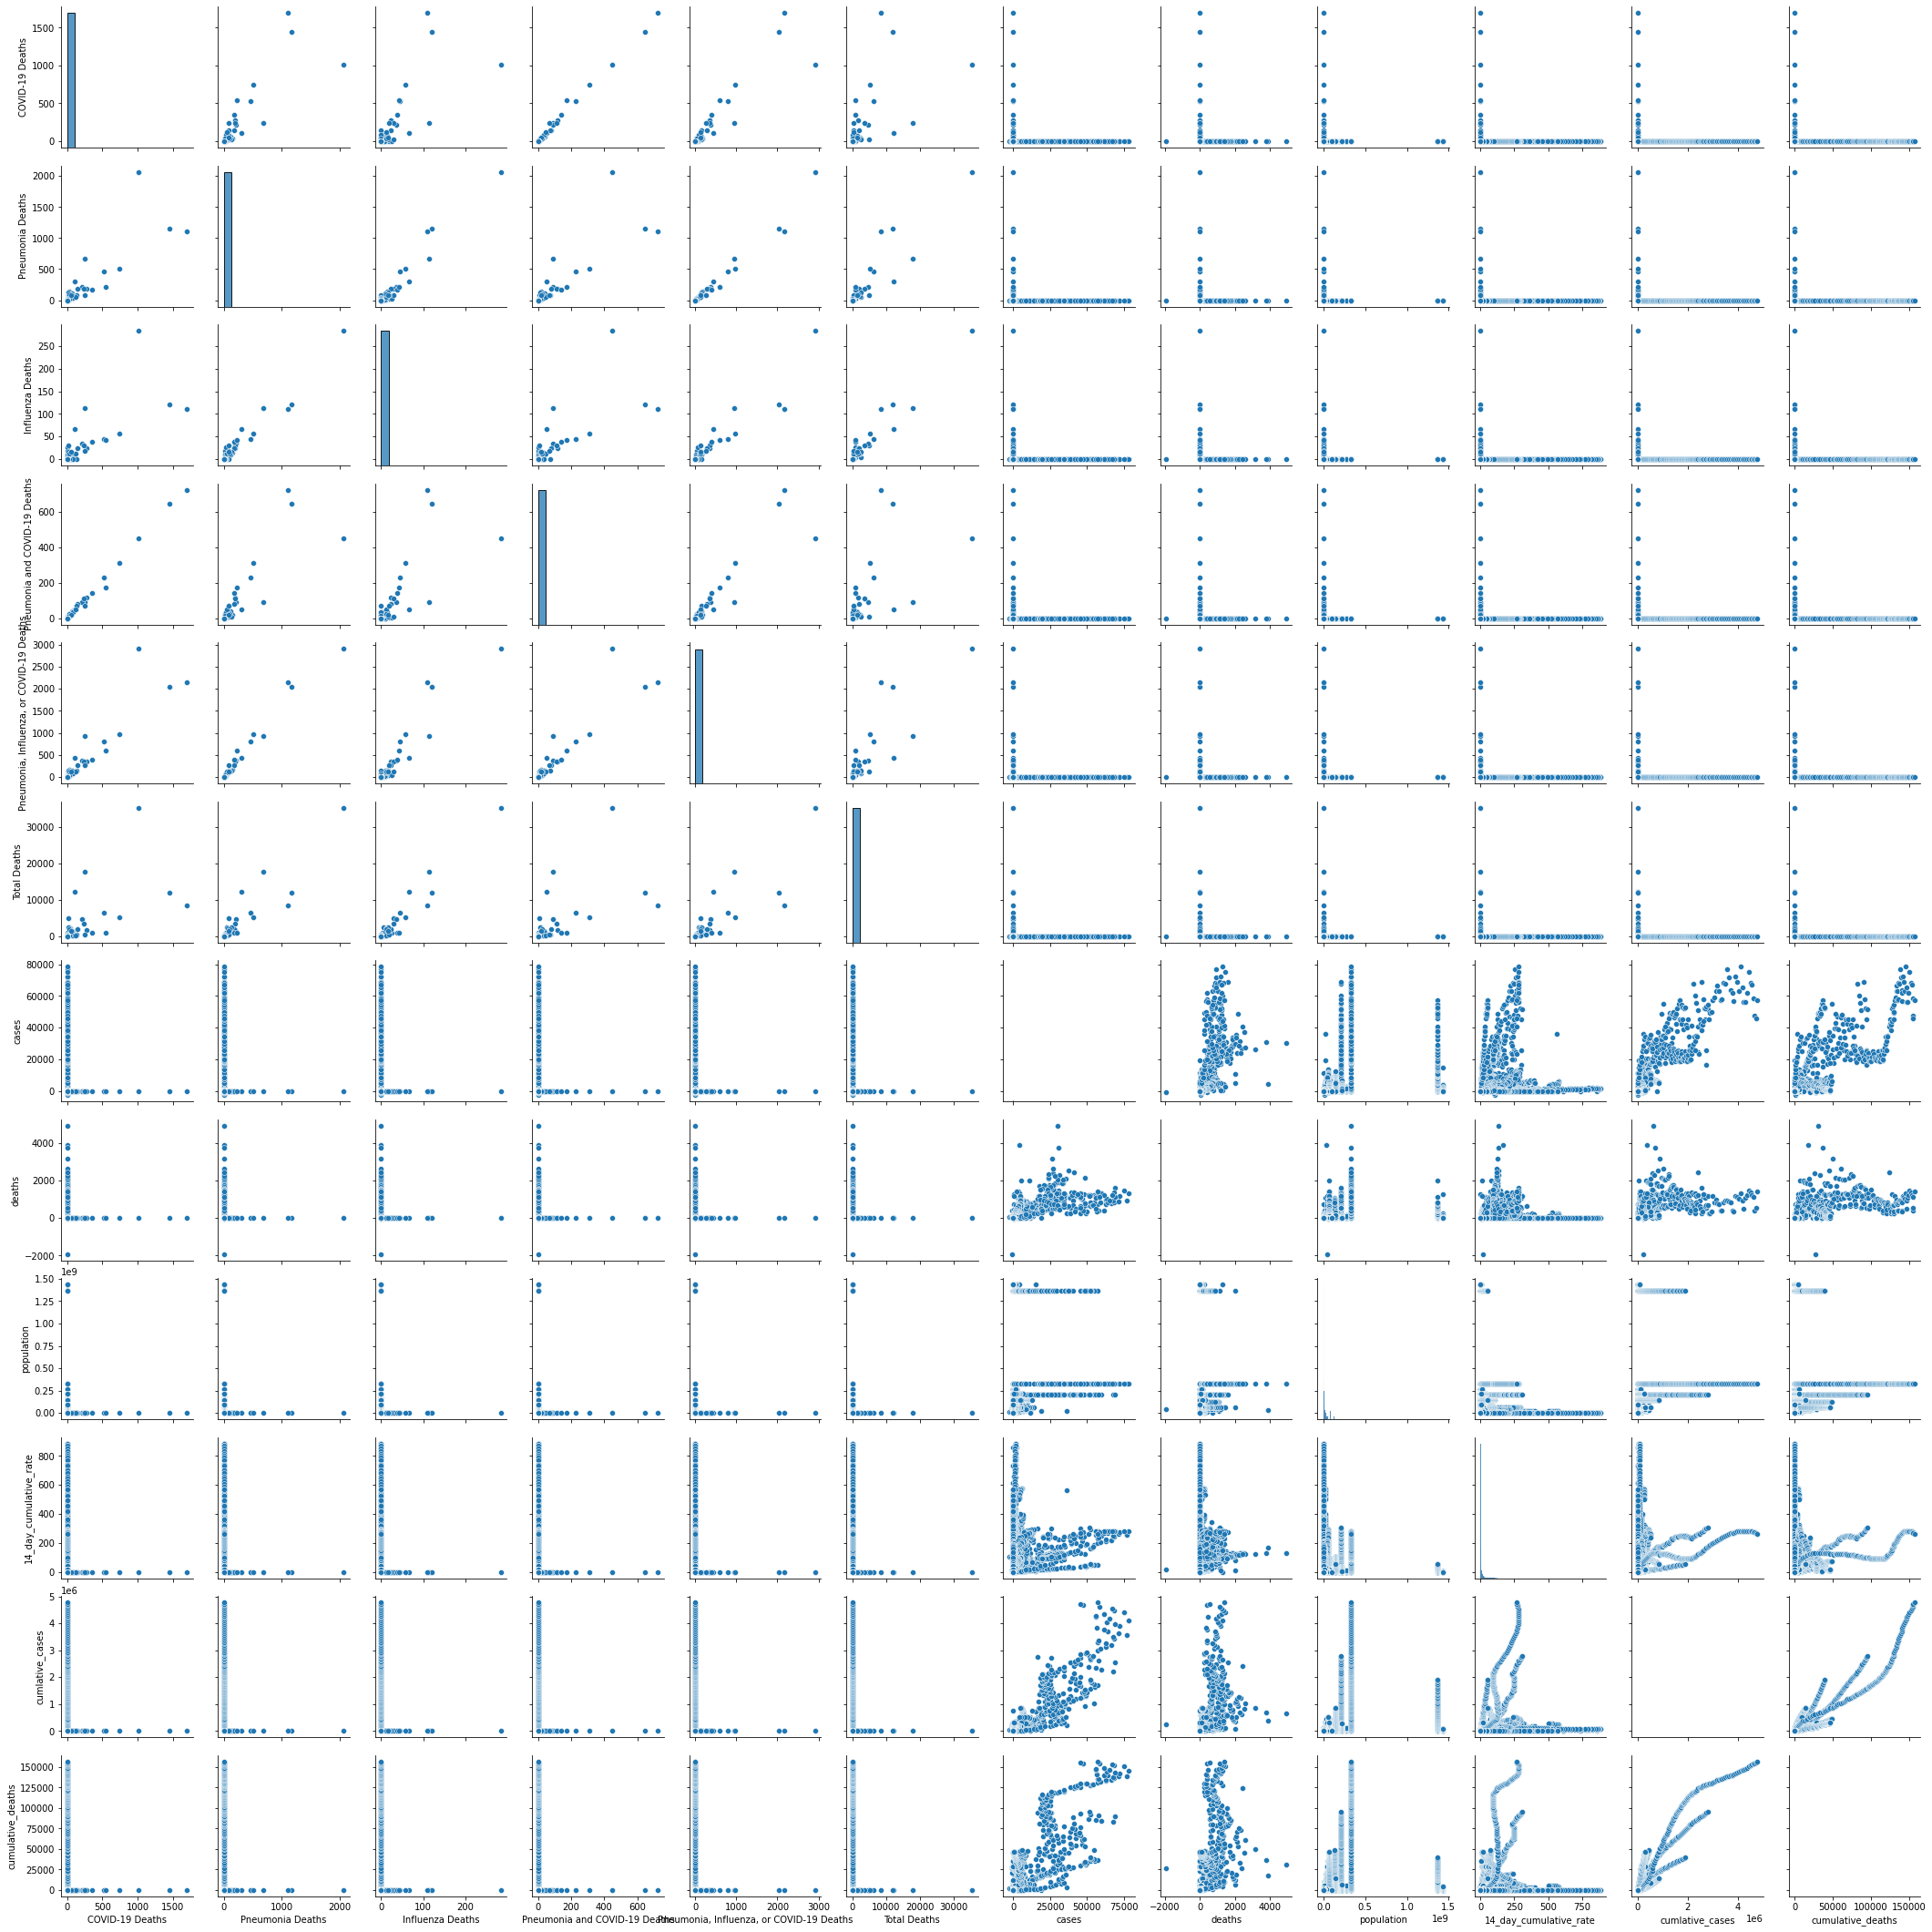

In [31]:
# Plot pairplot for all three files relevant to younger than 50 query. 
sns.pairplot(age_query)

# Conclusion

#### Although scientists first discovered COVID-19 in the winter of 2019, spring and summer of 2020 represented a significant increase in overall cases, daily cases and deaths. 

#### However, this analysis sought to do that which many sensational media outlets have not: Properly contextualize the impact of COVID-19 on a variety of populations and compare the virus' impact to other pathogens such as pneumonia and influenza.

#### One of the lessons of the pandemic has been how viral illnesses can disproportionately impact communities of color. As of June 2020, after non-white Hispanics, the black and Hispanic communities experienced 36,000 deaths between the months of March and June while white individuals experienced 51,000 deaths total. 

#### COVID-19's proportionate impact on the major ethnic communities seems to be an anamoly when compared to pneumonia and influenza. The white death toll for pneumonia and for influenza was three times that of black and Latino communities.

#### Age data for each virus, pneumonia, COVID and influenza revealed how suceptible both elderly and middle-age Americans are to highly transmissible viruses. While COVID-19 was most likely to kill those 85+, influenza was equally as likely to kill those 85+ as it was to kill those 74 - 85 and significantly more likely to be fatal for anyone ranging in age from 45 - 85.  

#### Although celebrities around the globe made news when they contracted or were hospitalized with COVID-19, those individuals only tended to die from the illness if they were 45 years old or older. Healthcare professionals have been warning the world about the inhumane conditions of hospitals and, to that end, the notable individual dataset revealed that nine prominent doctors died from COVID-19, mostly in the earliest hotspots such as the U.K. and China. The youngest deceased doctor was 52 years old. 

#### Echoing national media narratives, the data revealed that the U.S. has had the most difficult time maintaining the domestic spread of COVID-19. Both cumulative and daily case numbers have risen consistently since the pandemic declaration in March of 2020. Curiously, China's case numbers peaked and then declined by summer of 2020 due to stringent quarantine measures. 

#### As of summer 2020, the mean worldwide two week cumulative case rate was approximately 73%, meaning each nation saw a 70+ percent increase in COVID-19 diagnoses every two weeks. Governments at all levels are seeking emergency authorization to pass measures that seek to decrease cumulative community case numbers. 